In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('mergerd.csv', encoding='UTF-8-SIG')

In [16]:
customer_features = data.groupby('CustomerID').agg({
    'TotalValue': ['sum', 'mean', 'count'],
    'Quantity': ['sum', 'mean'],
    'ProductID': 'nunique'
}).reset_index()
customer_features

CustomerID TotalValue                    Quantity           ProductID
                      sum         mean count      sum      mean   nunique
0        C0001    3354.52   670.904000     5       12  2.400000         5
1        C0002    1862.74   465.685000     4       10  2.500000         4
2        C0003    2725.38   681.345000     4       14  3.500000         4
3        C0004    5354.88   669.360000     8       23  2.875000         8
4        C0005    2034.24   678.080000     3        7  2.333333         3
..         ...        ...          ...   ...      ...       ...       ...
194      C0196    4982.88  1245.720000     4       12  3.000000         3
195      C0197    1928.65   642.883333     3        9  3.000000         3
196      C0198     931.83   465.915000     2        3  1.500000         2
197      C0199    1979.28   494.820000     4        9  2.250000         4
198      C0200    4758.60   951.720000     5       16  3.200000         5

[199 rows x 7 columns]

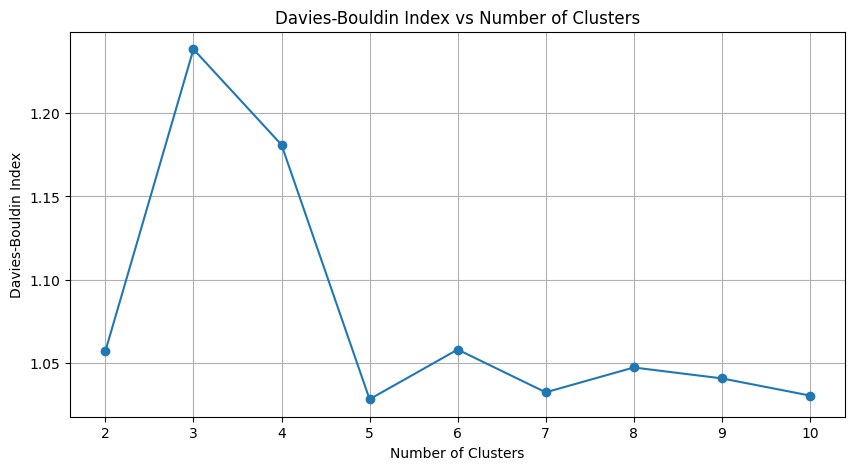

Optimal number of clusters based on DB Index: 5
Lowest DB Index score: 1.0284
Highest Silhouette score: 0.3522


In [18]:
X = customer_features.drop('CustomerID', axis=1)


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
db_scores = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    db_scores.append(davies_bouldin_score(X_scaled, clusters))
    silhouette_scores.append(silhouette_score(X_scaled, clusters))

plt.figure(figsize=(10, 5))
plt.plot(k_range, db_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.grid(True)
plt.show()


optimal_k = k_range[np.argmin(db_scores)]
print(f"Optimal number of clusters based on DB Index: {optimal_k}")
print(f"Lowest DB Index score: {min(db_scores):.4f}")
print(f"Highest Silhouette score: {max(silhouette_scores):.4f}")

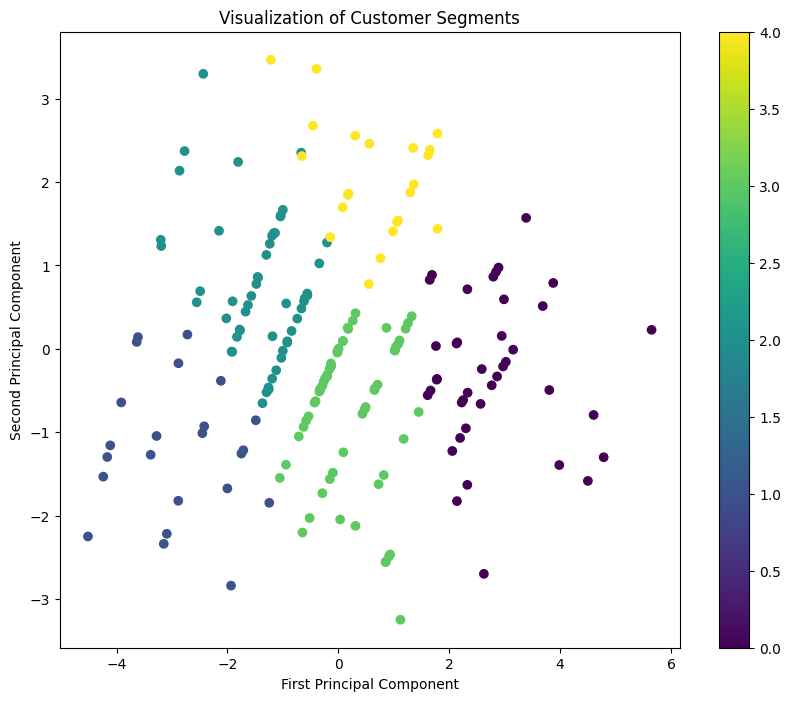

Cluster Characteristics:
        TotalValue       ProductID
               sum count   nunique
Cluster                           
0          5985.74  8.05      7.65
1           937.03  2.57      2.57
2          2206.50  3.13      3.06
3          3396.15  5.80      5.77
4          4657.02  4.43      4.26


In [ ]:

optimal_kmeans = KMeans(n_clusters=5, random_state=42)
customer_features['Cluster'] = optimal_kmeans.fit_predict(X_scaled)


from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=customer_features['Cluster'],
                      cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Visualization of Customer Segments')
plt.colorbar(scatter)
plt.show()


cluster_summary = customer_features.groupby('Cluster').agg({
    ('TotalValue', 'sum'): 'mean',
    ('TotalValue', 'count'): 'mean',
    ('ProductID', 'nunique'): 'mean'
}).round(2)


cluster_summary = cluster_summary.rename(columns={
    ('TotalValue', 'sum'): 'Total_Spend',
    ('TotalValue', 'count'): 'Transaction_Count',
    ('ProductID', 'nunique'): 'Unique_Products'
})

print("Cluster Characteristics:")
print(cluster_summary)


In [1]:
Customer Segmentation & Clustering - Implemented clustering techniques to segment customers, optimizing marketing strategies with data-driven decision-making

SyntaxError: invalid syntax (<ipython-input-1-a16e67073f77>, line 1)